In [61]:
%matplotlib inline
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Read CSV files, and then merge the two
#Changed the 'Geometry' coulmn names below so that the gmap could read the coordinates of the wards
crime2017_csv_path = "Resources/Crimes_MASTER_2017.csv"
crime2018_csv_path = "Resources/Crimes_MASTER_2018.csv"

crime_2018_df = pd.read_csv(crime2018_csv_path)
crime_2018_df = crime_2018_df.rename(columns={"Geometry" : "geometry"})
crime_2017_df = pd.read_csv(crime2017_csv_path)
crime_2017_df = crime_2017_df.rename(columns={"Geometry" : "geometry"})

crime_master = pd.concat((crime_2017_df,crime_2018_df),axis=0,join='outer',join_axes=None,ignore_index=False)

#drop any NA values
crime_master = crime_master.dropna(how='any')

#check to see if all columns match up 
crime_master.count()

ID                      104723
Date                    104723
IUCR                    104723
Primary Type            104723
Description             104723
Location Description    104723
District                104723
Ward                    104723
Community Area          104723
FBI Code                104723
X Coordinate            104723
Y Coordinate            104723
Year                    104723
Latitude                104723
Longitude               104723
geometry                104723
dtype: int64

Text(0.5, 1.0, '2017-2018 Chicago Crime')

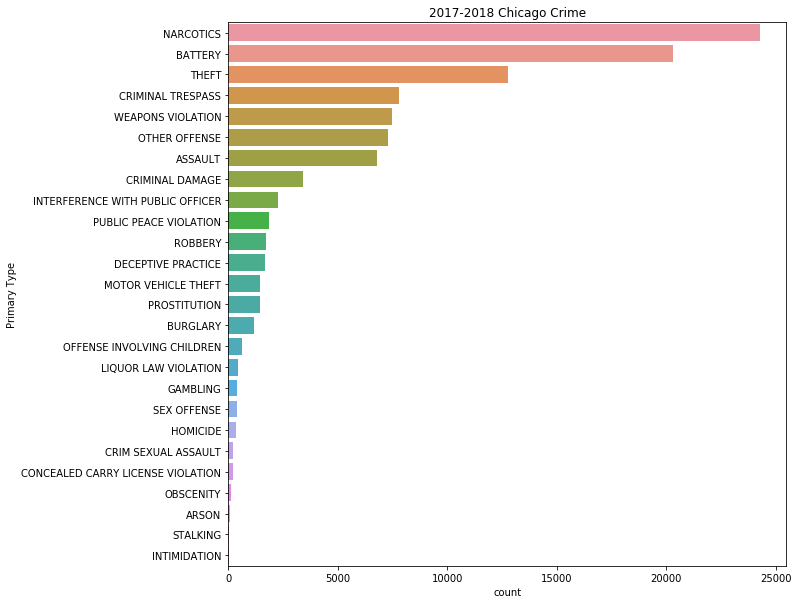

In [62]:
crime_types = crime_master['Primary Type'].value_counts()

plt.figure(figsize=(10,10))
sns.countplot(y='Primary Type', data=crime_master, 
              order = crime_master['Primary Type'].value_counts().iloc[:26].index).set_title("2017-2018 Chicago Crime")

Text(0.5, 1.0, 'Crime Locations of Chicago (2017-2018)')

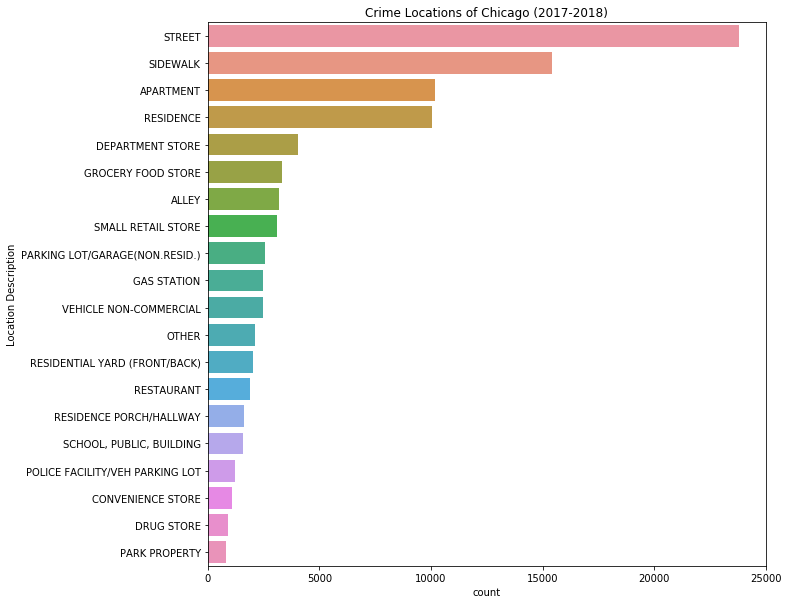

In [63]:
crime_types = crime_master['Location Description'].value_counts()

plt.figure(figsize=(10,10))
sns.countplot(y='Location Description', data=crime_master, 
              order = crime_master['Location Description'].value_counts().iloc[:20].index).set_title("Crime Locations of Chicago (2017-2018)")

Text(0.5, 1.0, 'Crime Totals of Chicago Wards (2017-2018)')

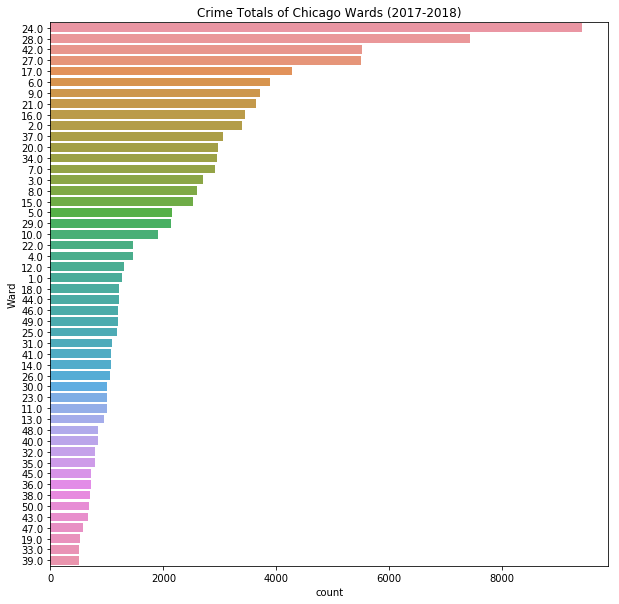

In [64]:
plt.figure(figsize=(10,10))

# Plot the world average as a line chart
sns.countplot(y='Ward', data=crime_master, 
              order = crime_master['Ward'].value_counts().iloc[:50].index).set_title("Crime Totals of Chicago Wards (2017-2018)")

<Figure size 1440x1440 with 0 Axes>

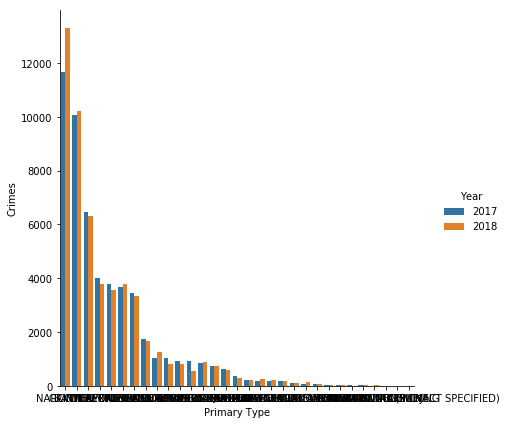

In [65]:
crime_types_2017 = crime_2017_df['Primary Type'].value_counts().reset_index()
crime_types_2018 = crime_2018_df['Primary Type'].value_counts().reset_index()

crime_types_merge = pd.merge(crime_types_2017, crime_types_2018, on = "index").rename(columns={"Primary Type_x":"2017", "Primary Type_y":"2018"})

crime_types_merge = pd.melt(crime_types_merge, id_vars="index", value_name="Crimes")
crime_types_merge = pd.DataFrame(crime_types_merge).rename(columns={"index":"Primary Type", "variable":"Year"})

plt.figure(figsize=(20,20))
#fig, ax = plt.subplotsfigsize=(20 ,20)
crime_comparison = sns.catplot(x='Primary Type', y='Crimes', hue='Year', data=crime_types_merge, kind='bar', height=6)
crime_comparison.savefig("2017_vs_2018 Crime.png")

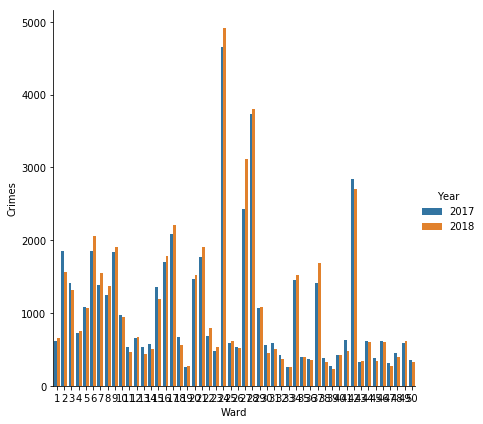

In [66]:
wards_2017 = crime_2017_df['Ward'].value_counts().reset_index()
wards_2018 = crime_2018_df['Ward'].value_counts().reset_index()

ward_types_merge = pd.merge(wards_2017, wards_2018, on = "index").rename(columns={"Ward_x":"2017", "Ward_y":"2018"})
ward_types_merge = pd.melt(ward_types_merge, id_vars="index", value_name="Crimes")
ward_types_merge = pd.DataFrame(ward_types_merge).rename(columns={"index":"Ward", "variable":"Year"})

#plt.figure(figsize=(20,20))
fig, ax = plt.subplotsfigsize=(20 ,20)
ward_comparison = sns.catplot(x='Ward', y='Crimes', hue='Year', data=ward_types_merge, kind='bar', height=6)
ward_comparison.savefig("2017_vs_2018_wardcrime.png")

In [60]:
ward_count = pd.DataFrame(crime_master["Ward"].value_counts())
ward_count.head()

,Ward
24.0,9411
28.0,7431
42.0,5526
27.0,5501
17.0,4274


In [ ]:
#do a loc on the top 5 wards, have the wards on the map (seperate maps) and show the crime breakdowns per ward
